## Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
# creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,SalestoPurchaseRatio,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,0.252977,1.338647,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,0.210628,1.266830,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,0.246758,1.327594,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,0.271399,1.372493,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,0.284128,1.396897,0.983556


## Exploratory Data Analysis

- Previuosly we examined the various tables in database to identify key variables, understand their relationships, and determine which ones should be used in the final analysis
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each columns. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [7]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05


In [8]:
df["ProfitMargin"] = df["ProfitMargin"]*100

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05


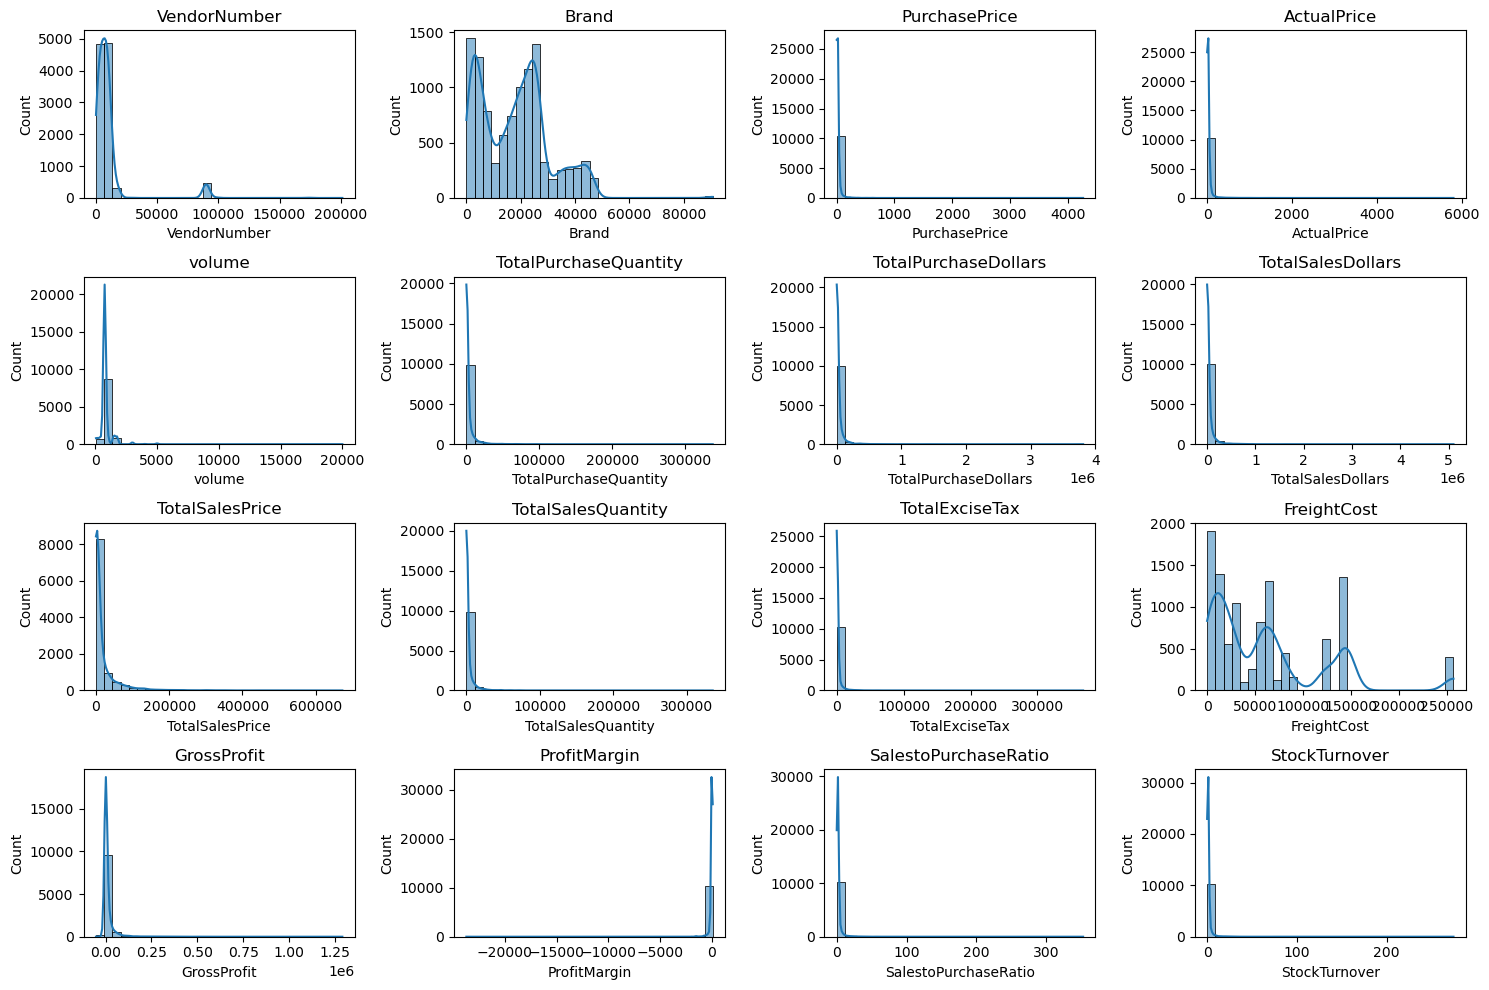

In [10]:
#Distribution Plots for numerical columns 

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure (figsize = (15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show()

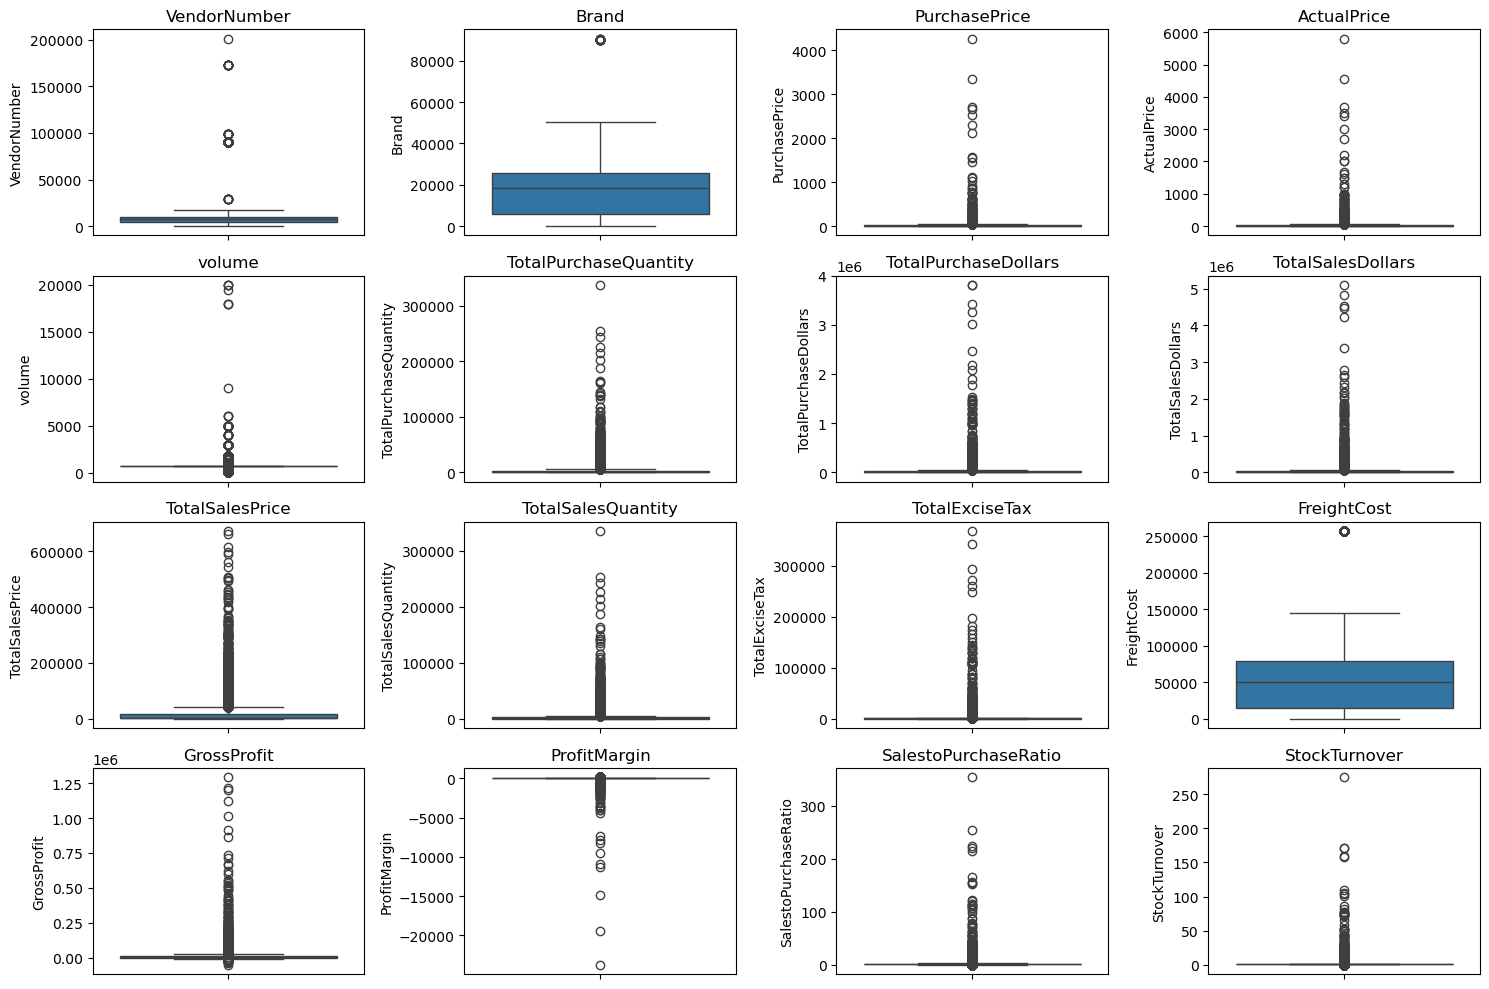

In [11]:
#Boxplots for numerical columns 
plt.figure(figsize = (15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Summary Statistics Insights:
**Negative & Zero Values:**

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
  

**Outliers Indicated by High Standard Deviations:**
- Purchase & Actual Prices: The max values (4264.70 & 5,799.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [13]:
#lets filter the data by removing inconsistencies
df = pd.read_sql_query(
    """SELECT * 
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
          AND ProfitMargin > 0""", conn
)

In [14]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,SalestoPurchaseRatio,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049,260999.20,68601.68,1290667.91,0.252977,1.338647,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247,294438.66,144929.24,1015032.27,0.210628,1.266830,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140,343854.07,123780.22,1119816.92,0.246758,1.327594,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412,368242.80,257032.07,1214774.94,0.271399,1.372493,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838,249587.83,257032.07,1199901.61,0.284128,1.396897,0.983556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5,0.55,27100.41,13.31,0.834483,6.041667,2.500000
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134,7.04,50293.62,63.32,0.964362,28.059829,22.333333
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2,0.10,14069.87,0.50,0.252525,1.337838,1.000000
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72,15.12,257032.07,141.81,0.989740,97.469388,72.000000


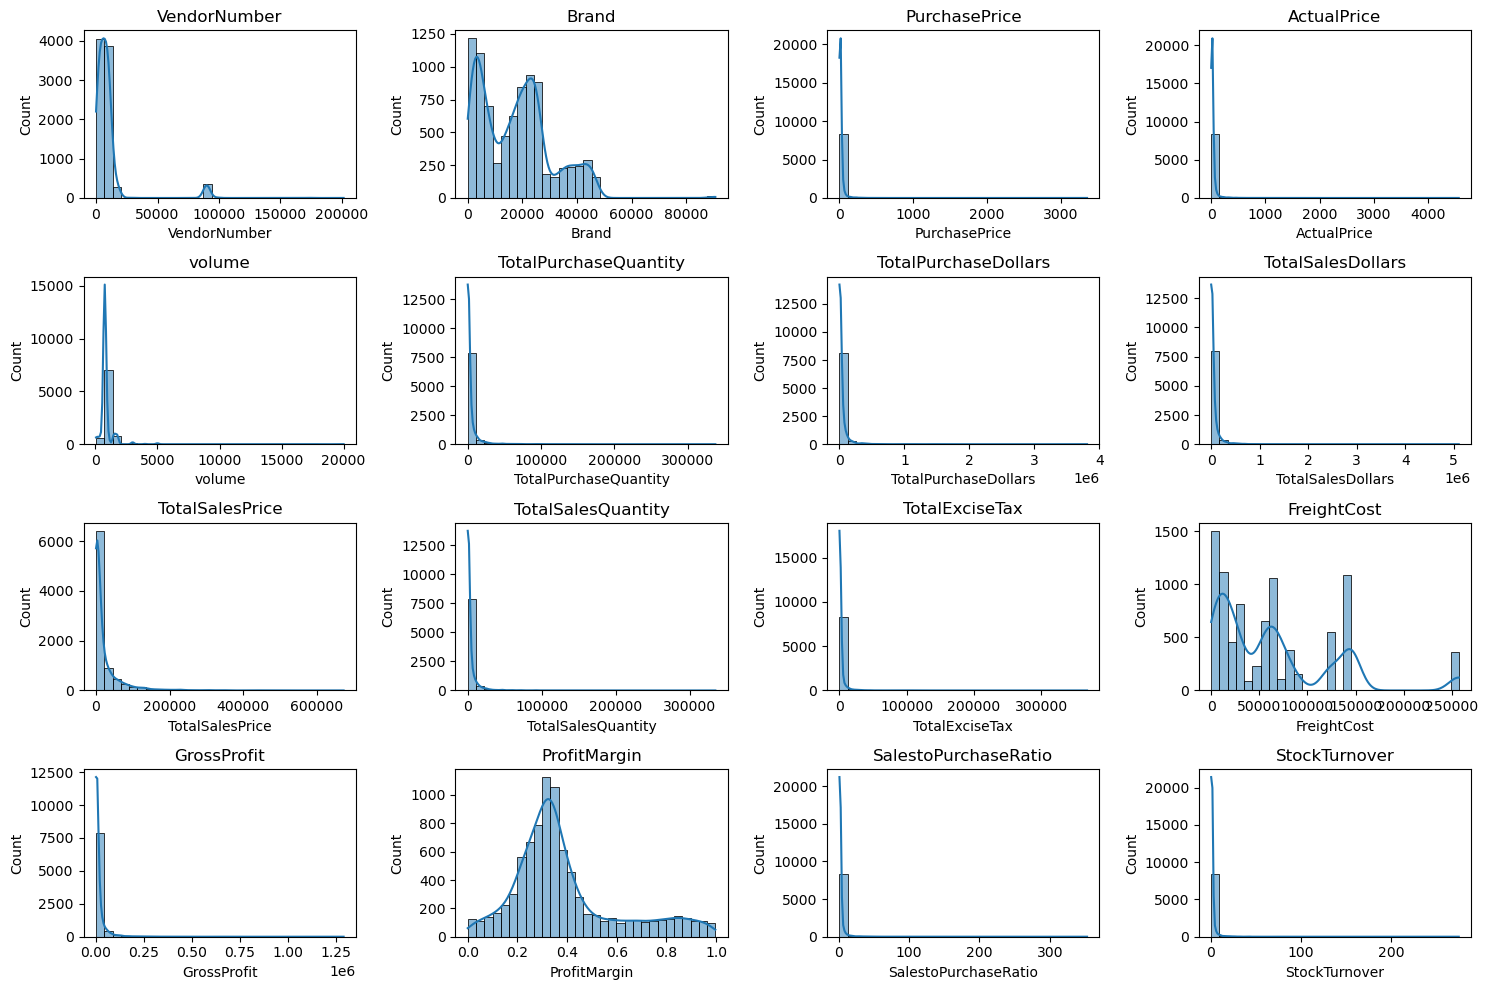

In [15]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure (figsize = (15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)

plt.tight_layout()
plt.show()

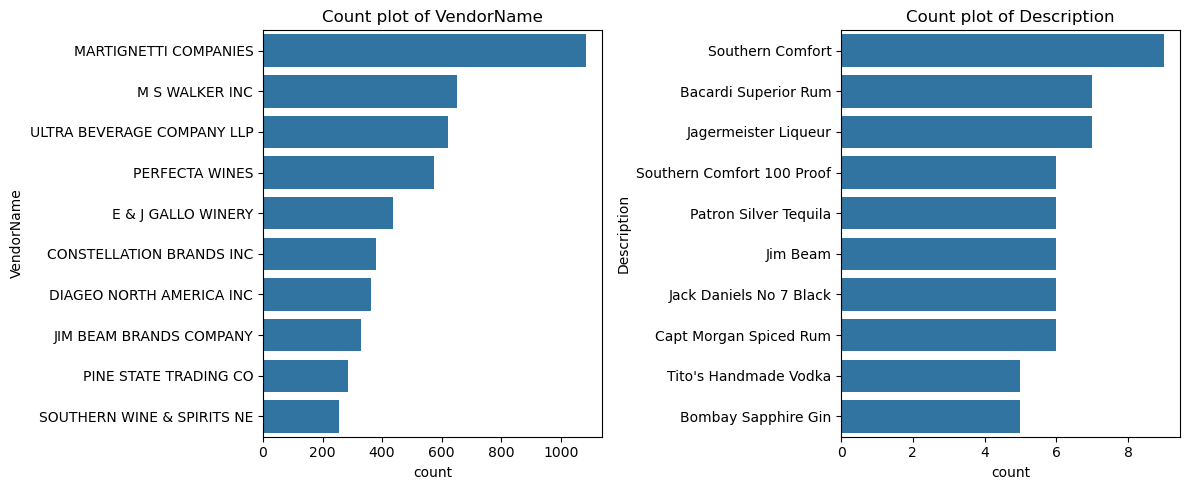

In [16]:
#count plots for categorical plots
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot( y = df[col], order = df[col].value_counts().index[0:10]) #top 10 categories
    plt.title( f"Count plot of {col}")

plt.tight_layout()
plt.show()

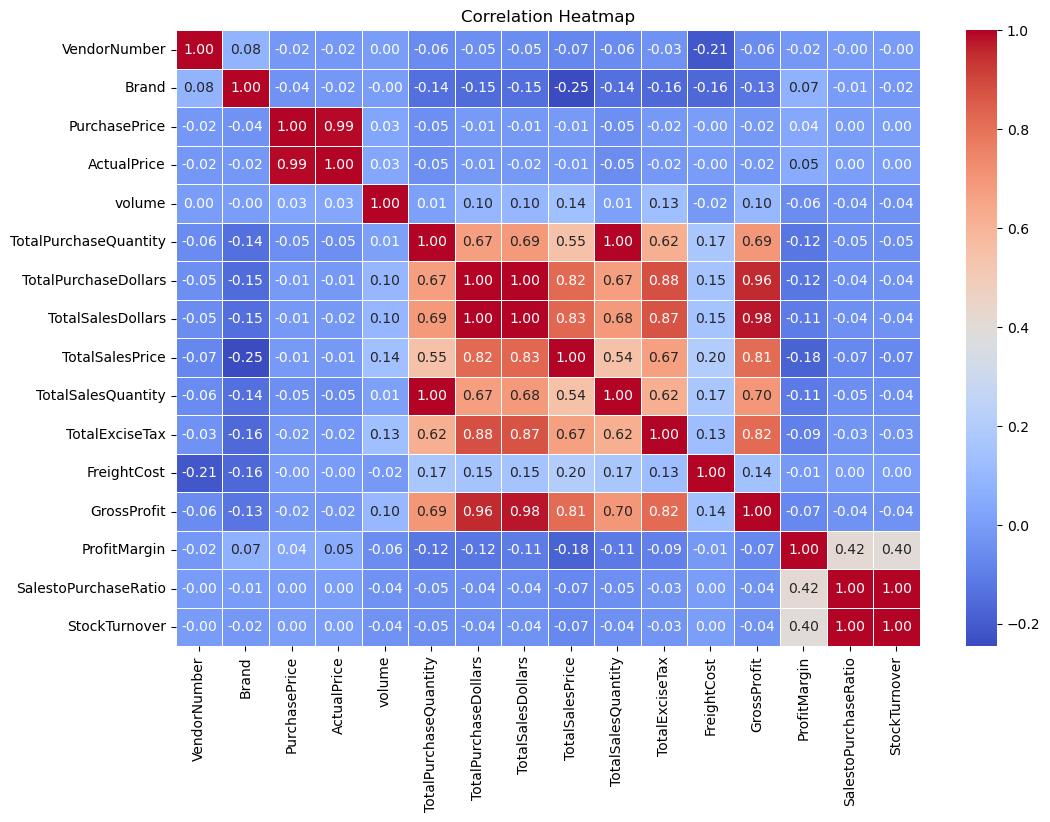

In [307]:
# Correlation Heatmap

plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both Gross Profit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

## Data Analysis

#### Identify the Brands that need Promotional or Pricing Adjustments which exhibhit lower sales performance but higher profit margins

In [21]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'}). reset_index()

In [22]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
higher_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [23]:
low_sales_threshold

560.299

In [24]:
higher_margin_threshold

0.6497017552750112

In [25]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars']<= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= higher_margin_threshold)
]
print("Brands with low sales but high profit margin:")
display(target_brands.sort_values(['TotalSalesDollars']))

Brands with low sales but high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


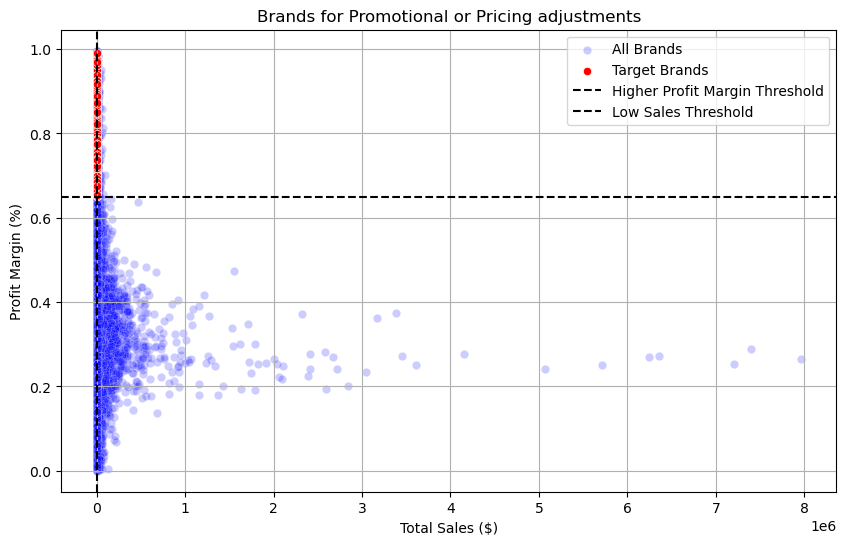

In [26]:
# plotting a scatterplot to better understand a distribution

plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', label = 'All Brands', color = 'blue', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', label = 'Target Brands', color = 'red')

plt.axhline(higher_margin_threshold, linestyle = '--', color = 'black', label = 'Higher Profit Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')

plt.title('Brands for Promotional or Pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
#filtering out high sales for better visualizations
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

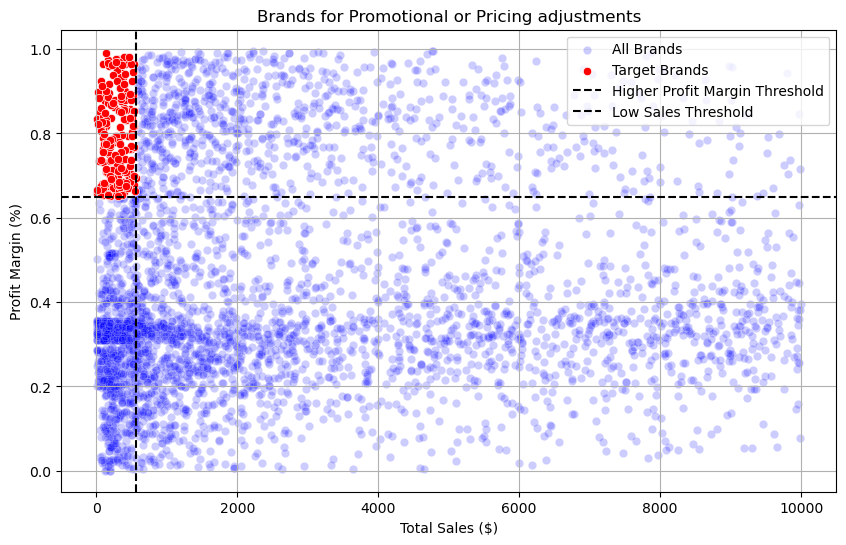

In [28]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance, x = 'TotalSalesDollars', y = 'ProfitMargin', label = 'All Brands', color = 'blue', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'ProfitMargin', label = 'Target Brands', color = 'red')

plt.axhline(higher_margin_threshold, linestyle = '--', color = 'black', label = 'Higher Profit Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')

plt.title('Brands for Promotional or Pricing adjustments')
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstrate the highest sales performance?

In [30]:
# Top Vendors and Brands by sales performance

top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [31]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [32]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [33]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/ 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/ 1_000:.2f}K"
    else: 
        return str(value)    

In [34]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [35]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

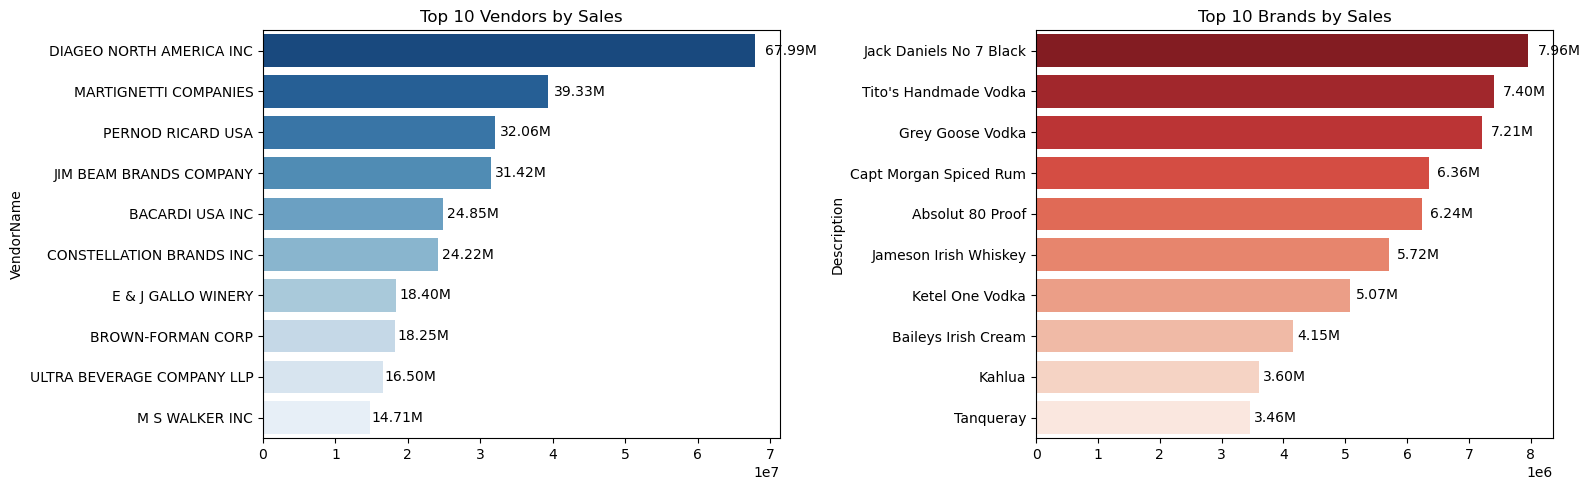

In [59]:
# barplot for top vendors and brands

plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = 'Blues_r')
plt.title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02), 
            bar.get_y() + bar.get_height()/2, 
            format_dollars(bar.get_width()),
            ha = 'left', va = 'center', fontsize = '10', color = 'black')

plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index, x = top_brands.values, palette = 'Reds_r')
plt.title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02), 
            bar.get_y() + bar.get_height()/2, 
            format_dollars(bar.get_width()),
            ha = 'left', va = 'center', fontsize = '10', color = 'black')

plt.tight_layout()
plt.show()

#### Which vendors contribute the most to total purchase dollars?

In [75]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' : 'sum'
}).reset_index()

In [79]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [89]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [93]:
top_vendors = vendor_performance.head(10)

In [97]:
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

In [99]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [108]:
top_vendors['Cummulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

In [110]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


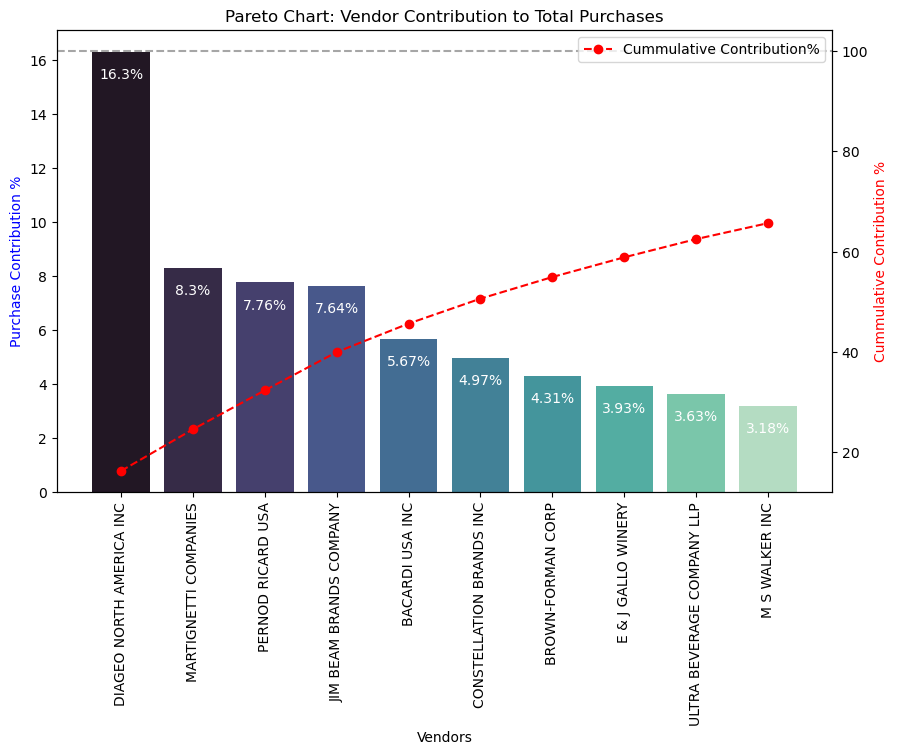

In [156]:
fig, ax1 = plt.subplots(figsize = (10,6))

#Bar plot for Purchase Contribution%
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = 'mako', ax = ax1)


for bar in ax1.patches:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() -1, str(bar.get_height())+'%', ha = 'center', color = 'white', fontsize = 10)

#Line plot for Cummulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cummulative_Contribution%'], color = 'red', marker = 'o', linestyle = 'dashed', label = 'Cummulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cummulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color = 'grey', linestyle = 'dashed', alpha = 0.7)
ax2.legend(loc = 'upper right')

plt.show()


#### How much of total procurement is dependent on the top vendors?

In [162]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


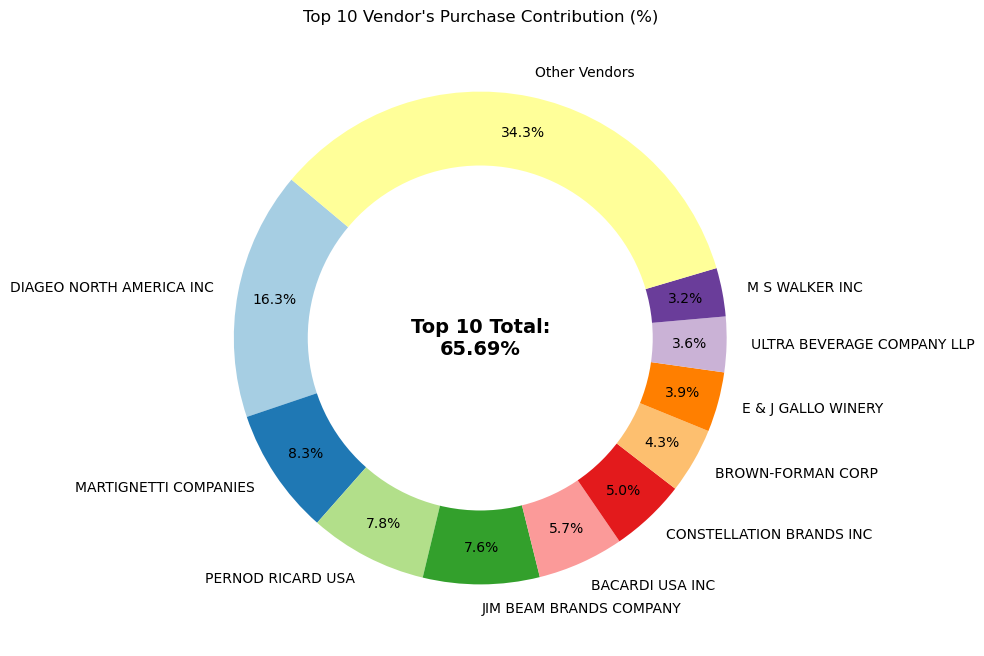

In [196]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append 'Other Vendors' categories
vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))

wedges, texts, autotexts = ax.pie(purchase_contribution, labels = vendors, autopct = '%1.1f%%', 
                                  startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

# Drawing a white circlein the middle to create a donut effect
center_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig.gca().add_artist(center_circle)

# Add total contribution annotation in the centre
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize = 14, fontweight = 'bold', ha = 'center', va = 'center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [207]:
# Creating buckets to divide Purchase Quantity into large, medium, small 
df['Order_Size'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3, labels = ['Small', 'Medium', 'large'])

In [213]:
df.groupby('Order_Size')[['PurchasePrice']].mean()

,PurchasePrice
Order_Size,
Small,39.068186
Medium,15.486414
large,10.777625


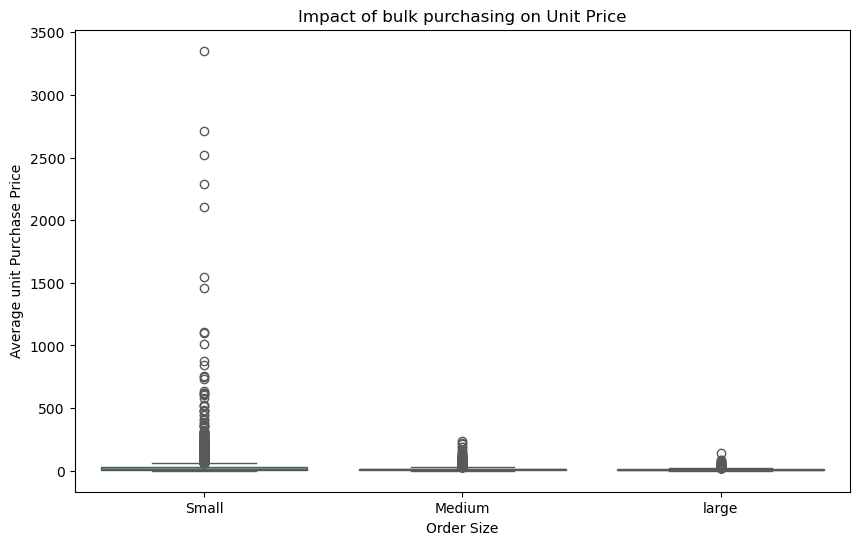

In [217]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Order_Size', y = 'PurchasePrice', palette = 'Set2')
plt.xlabel('Order Size')
plt.ylabel('Average unit Purchase Price')
plt.title('Impact of bulk purchasing on Unit Price')
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turn over, indicating excess stock and slow moving products?

In [313]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10).reset_index()

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
1,HIGHLAND WINE MERCHANTS LLC,0.708333
2,PARK STREET IMPORTS LLC,0.751306
3,Circa Wines,0.755676
4,Dunn Wine Brokers,0.766022
5,CENTEUR IMPORTS LLC,0.773953
6,SMOKY QUARTZ DISTILLERY LLC,0.783835
7,TAMWORTH DISTILLING,0.797078
8,THE IMPORTED GRAPE LLC,0.807569
9,WALPOLE MTN VIEW WINERY,0.820548


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [236]:
 df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print("Total unsold capital: ", format_dollars(sum(df['UnsoldInventoryValue'])))

Total unsold capital:  2.71M


In [250]:
#Aggregate Capital locked per Vendor
inventory_value_per_vendor = df.groupby('VendorName')[['UnsoldInventoryValue']].sum().reset_index()

#Sort vendors with highest Capital Locked
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is 95% confidence intervals for profit margins for top-performing and low-performing vendors?

In [253]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [268]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [266]:
df['ProfitMargin'] = df['ProfitMargin']*100

In [272]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [276]:
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1)/ np.sqrt(len(data))   #standard error
    t_critical = stats.t.ppf((1+ confidence)/2, df = len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error 

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


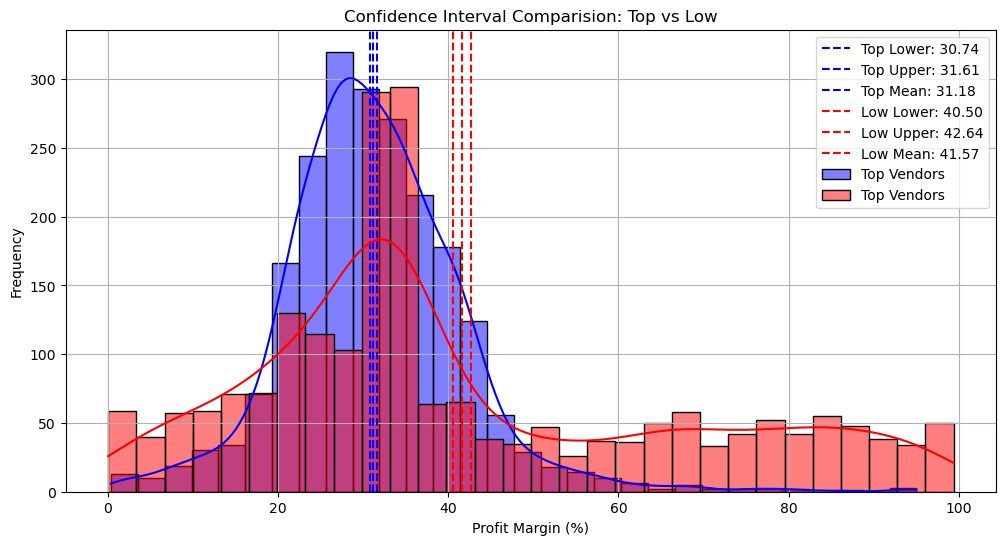

In [292]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize = (12,6))

#Top Vendors Plot
sns.histplot(top_vendors, kde = True, color = "blue", bins = 30, alpha = 0.5, label = 'Top Vendors')
plt.axvline(top_lower, color = 'blue', linestyle = '--', label = f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color = 'blue', linestyle = '--', label = f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color = 'blue', linestyle = '--', label = f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde = True, color = "red", bins = 30, alpha = 0.5, label = 'Top Vendors')
plt.axvline(low_lower, color = 'red', linestyle = '--', label = f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color = 'red', linestyle = '--', label = f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color = 'red', linestyle = '--', label = f"Low Mean: {low_mean:.2f}")

#Finalize plot
plt.title("Confidence Interval Comparision: Top vs Low")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

#### Is there a significant difference in profit margins between top-performing and low-performing vendors? 

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [301]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

#Perform Two-Sample test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

#Print Results
print(f"T-statistic: {t_stat:.4f}, P-value:{p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is no significant difference in the mean profit margins of top-performing and low-performing vendors.")
else:
    print("Fail to reject H₀: No significant difference in profit margins.")


T-statistic: -17.6695, P-value:0.0000
Reject H₀: There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
